<a href="https://colab.research.google.com/github/arvinfatemi/xOVS288wVKBQFYVD/blob/main/HappyCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [3]:
survey_data = pd.read_csv('ACME-HappinessSurvey2020.csv')
survey_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
survey_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [6]:
X = survey_data.drop(columns=['Y'])
Y = survey_data['Y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

In [12]:
models = {
    "Logistic Regression":  LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest":        RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC":                  SVC(random_state=42),
    "XGBoost":              XGBClassifier(
                               use_label_encoder=False,
                               eval_metric="logloss",
                               random_state=42
                           )
}

In [16]:
def test_models(models, X_train, X_test, y_train, y_test):
  results = []
  for name, model in models.items():

      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      test_acc = accuracy_score(y_test, y_pred)
      results.append({
          "Model": name,
          "Hold-out Acc": test_acc
      })
  return pd.DataFrame(results)

In [52]:
test_models(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Hold-out Acc
0,Logistic Regression,0.461538
1,Random Forest,0.615385
2,SVC,0.461538
3,XGBoost,0.653846


In [18]:
for x in X.columns:
  print(x, X[x].value_counts())

X1 X1
5    65
4    40
3    20
1     1
Name: count, dtype: int64
X2 X2
3    42
2    34
1    27
4    17
5     6
Name: count, dtype: int64
X3 X3
3    55
4    33
5    17
2    14
1     7
Name: count, dtype: int64
X4 X4
4    53
3    41
5    25
2     5
1     2
Name: count, dtype: int64
X5 X5
4    50
5    31
3    22
2    16
1     7
Name: count, dtype: int64
X6 X6
5    57
4    47
3    20
2     1
1     1
Name: count, dtype: int64


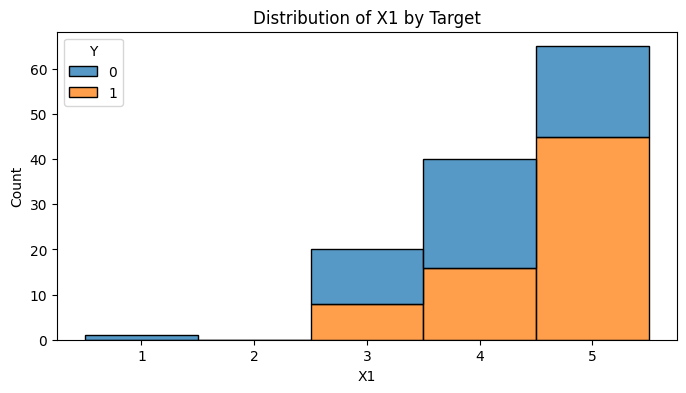

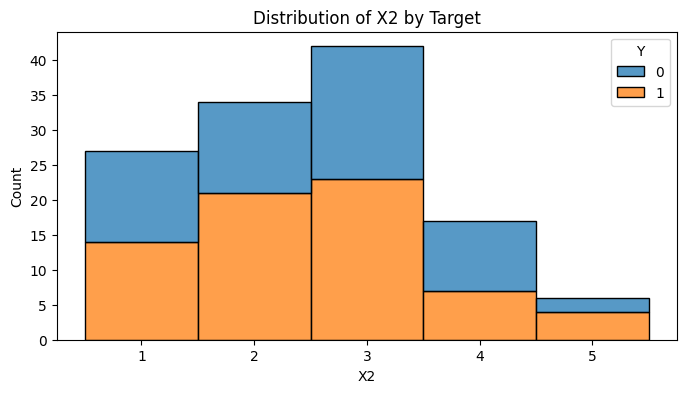

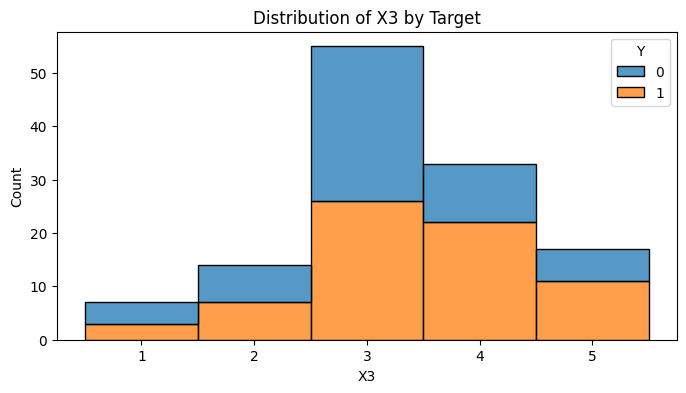

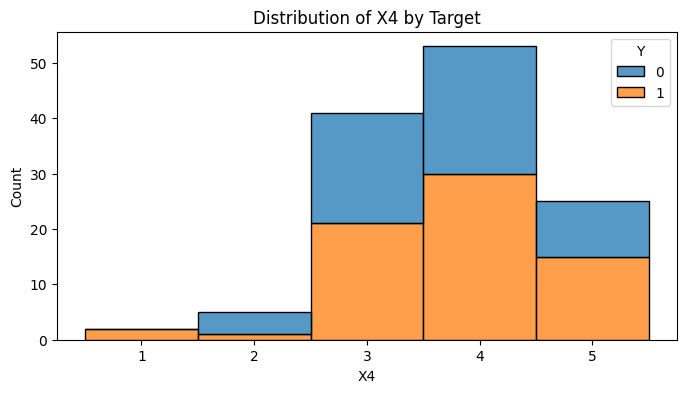

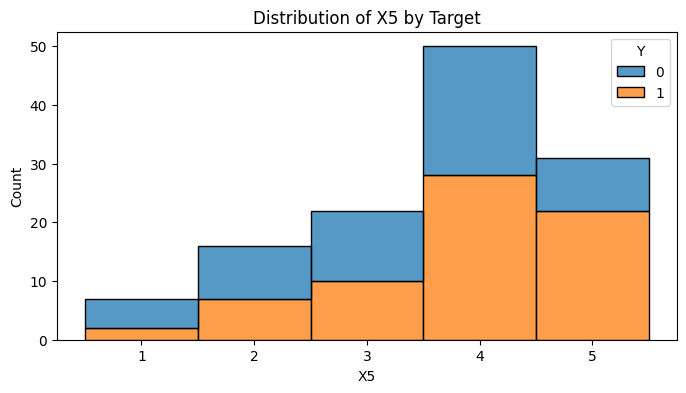

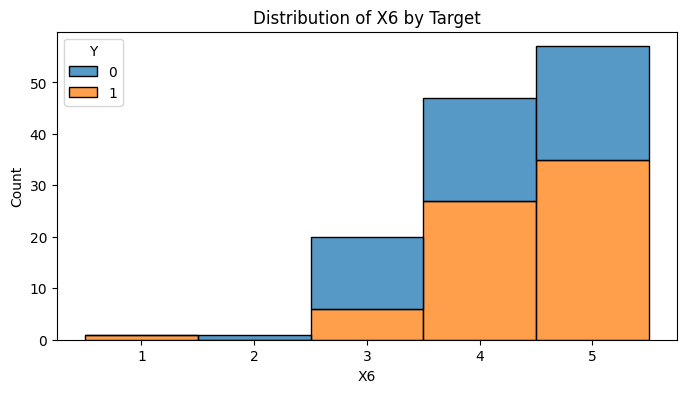

In [23]:
import seaborn as sns

for col in X.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(
        data=survey_data,
        x=col,
        hue='Y',
        multiple='stack',    # ← stack instead of layer
        discrete=True        # ← treat x as discrete categories
    )
    plt.title(f'Distribution of {col} by Target')
    plt.ylabel('Count')
    plt.show()

In [24]:
X.loc[X['X1'].isin([1,2]), 'X1'] = 3
X['X1'].value_counts()

,count
X1,
5,65
4,40
3,21


In [ ]:
def replace_values(c):

  return

In [34]:
def replace_values(df_column):
    df_column_copy = df_column.copy()
    df_column_copy.loc[df_column_copy.isin([1, 2])] = 3
    return df_column_copy.values.reshape(-1,1)

In [40]:
def replace_values(X: np.ndarray) -> np.ndarray:
    X2 = X.copy()
    mask = np.isin(X2, [1, 2])
    X2[mask] = 3
    return X2

In [53]:
def replace_values(X: np.ndarray) -> np.ndarray:
    X2 = X.copy()
    mask = np.isin(X2, [1, 2])
    X2[mask] = 3
    return X2

In [54]:
preprocessing = ColumnTransformer(
    transformers=[
        ('group_1', FunctionTransformer(replace_values), [0,5])
    ],
    remainder='passthrough'
)

In [55]:
results = []
for name, model in models.items():

  pipe = Pipeline([
      ('pre', preprocessing),
      ('clf', model)
  ])

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  acc = accuracy_score(y_test, y_pred)

  results.append({
      'Model': name,
      'Hold-out Acc': acc
  })

print(pd.DataFrame(results))

                 Model  Hold-out Acc
0  Logistic Regression      0.461538
1        Random Forest      0.500000
2                  SVC      0.461538
3              XGBoost      0.653846


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:37:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [47]:
print(models)

{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'SVC': SVC(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)}


In [59]:
X2 = X.copy()
X2.loc[X2['X1'].isin([1,2]), 'X1'] = 3
X2.loc[X2['X6'].isin([1,2]), 'X6'] = 3

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X2, Y,
    test_size=0.2,
    random_state=42
)

In [61]:
test_models(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:40:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Hold-out Acc
0,Logistic Regression,0.461538
1,Random Forest,0.576923
2,SVC,0.461538
3,XGBoost,0.653846


In [62]:
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [69]:
X3 = X.copy()
X3['total'] = X3.sum(axis=1)
X3.head()

,X1,X2,X3,X4,X5,X6,total
0,3,3,3,4,2,4,19
1,3,2,3,5,4,3,20
2,5,3,3,3,3,5,22
3,5,4,3,3,3,5,23
4,5,4,3,3,3,5,23


In [70]:
X3['avg'] = X3.mean(axis=1)
X3.head()

,X1,X2,X3,X4,X5,X6,total,avg
0,3,3,3,4,2,4,19,5.428571
1,3,2,3,5,4,3,20,5.714286
2,5,3,3,3,3,5,22,6.285714
3,5,4,3,3,3,5,23,6.571429
4,5,4,3,3,3,5,23,6.571429


In [71]:
X3 = X3.drop(columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
X3.head()

,total,avg
0,19,5.428571
1,20,5.714286
2,22,6.285714
3,23,6.571429
4,23,6.571429


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X3, Y,
    test_size=0.2,
    random_state=42
)

In [73]:
test_models(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:57:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Hold-out Acc
0,Logistic Regression,0.538462
1,Random Forest,0.615385
2,SVC,0.423077
3,XGBoost,0.692308


In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

preprocessing = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), ['total', 'avg'])
    ]
)

results = []
for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocessing),
        ('clf', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Hold-out Acc': acc
    })

print(pd.DataFrame(results))

                 Model  Hold-out Acc
0  Logistic Regression      0.538462
1        Random Forest      0.653846
2                  SVC      0.461538
3              XGBoost      0.692308


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:59:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
